In [6]:
%load_ext autoreload
%autoreload 2

import plots
import runner
import analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Coupled Networks

2 EI Populations connected by delayed excitatory connections.

The configuration below is the baseline for the coupled network configuration.
Each population shows high activity in the gamma frequency band produced by the PING mechanism.
Both populations are connected with each other sparsly by their excitatory neurons. 
The `J_ppee`, `J_ppei` and `const_delay` parameter determine the influence both networks have on each other.
Additionally, we can also control the influence by the number of connections (`K_ppee`, `K_ppei`).
 
Observed Effects:

* 2 PINGs (one PING: E burst leads to I burst) after another and perfect synchronization if coupling between the two networks is too strong (J_pppe = 0.2)
* Some inhibitory neurons fire twice as they are being excited by excitatory neuron of other network (J_ppee = 0.01)
* Almost no inter-network effects observable (J_ppee = 0.001)


Parameter:

* const_delay is in ms
    * 4.0 ms is used by Buehlmann2010 to produce phase shift
* J_ppee: strength of E <-> E synapses
* J_ppei: strength of E -> I synapses


In [7]:
model = runner.run(modified_params={ 
    "N_pop": 2, 
    "J_ppee": 0.2, 
    "J_ppei": 0.2,
    "const_delay": 0.0 
}, file_name="2-pop-base")

initializing net ...
initialization time: 0.44666290283203125s
------------------ running network!


INFO       Overwriting environment variable "DYLD_LIBRARY_PATH" [brian2.devices.cpp_standalone.device.overwritten_env_var]


runtime: 15.5


In [8]:
if 'model' not in locals() or model is None:
    model = analysis.load_model("2-pop-base")

Generate PSD plot ...
Generate PSD plot ...


(<Figure size 576x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12de9b400>)

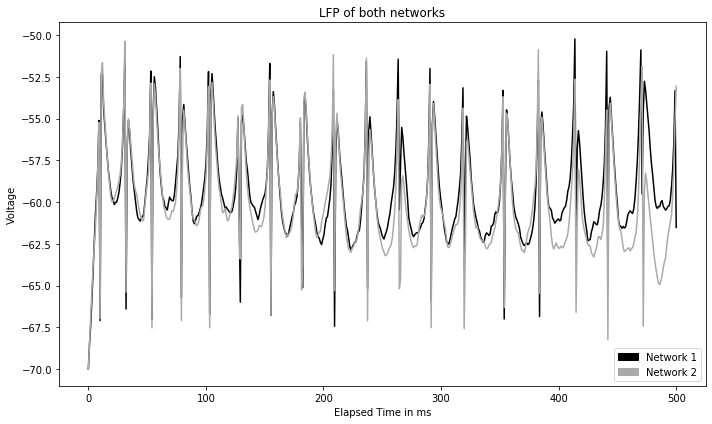

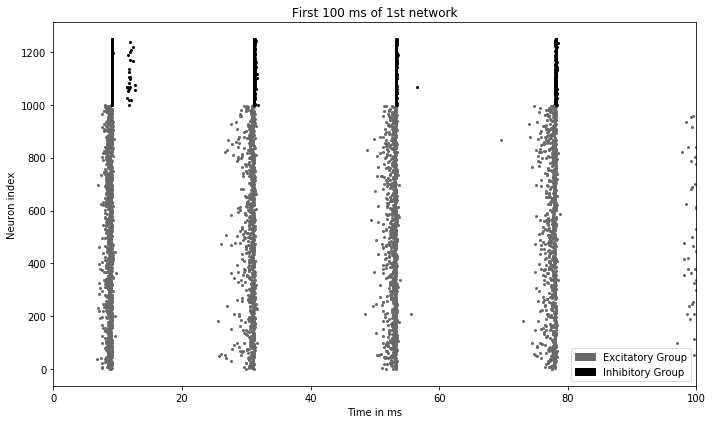

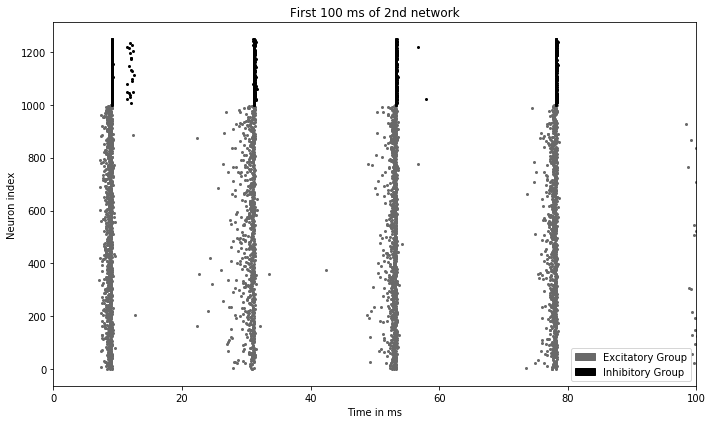

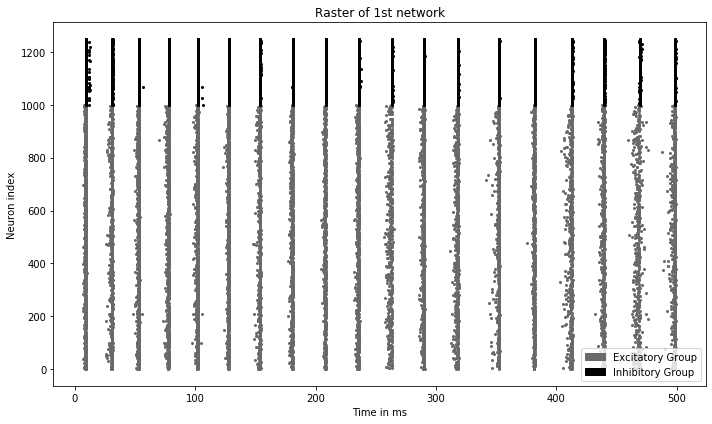

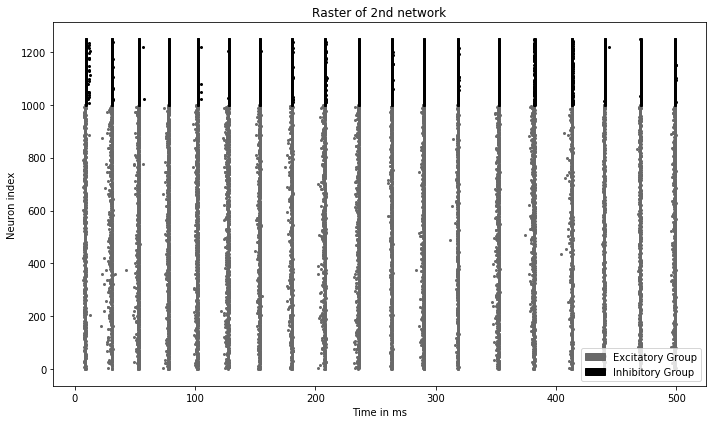

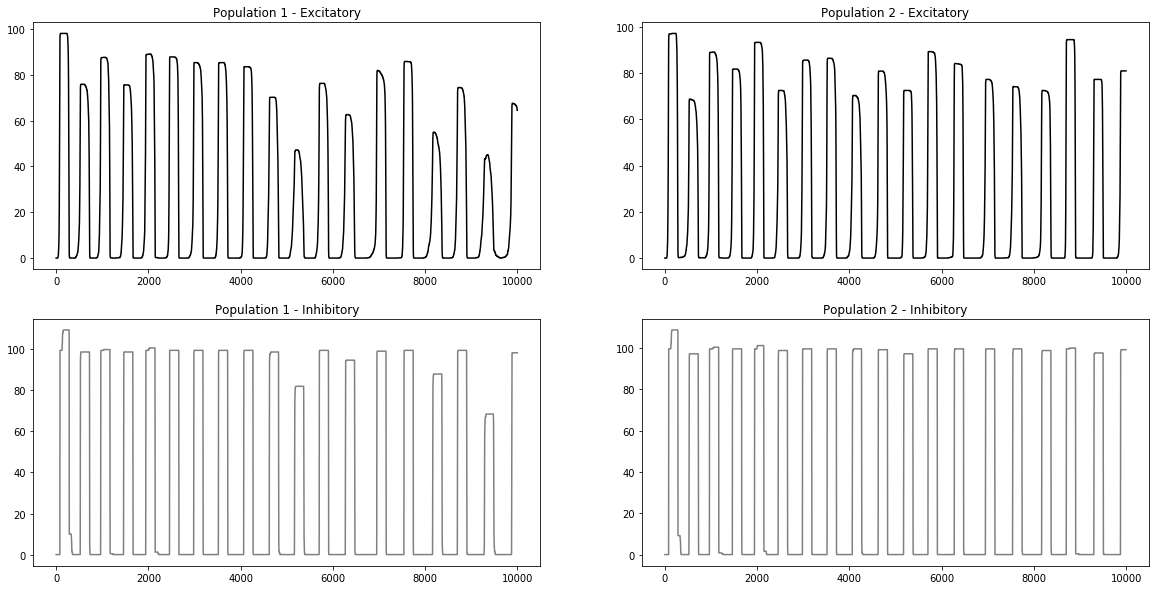

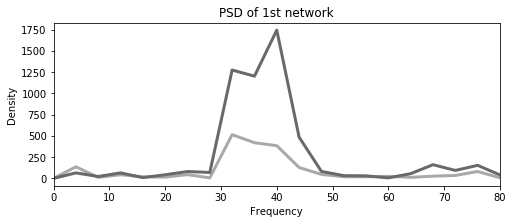

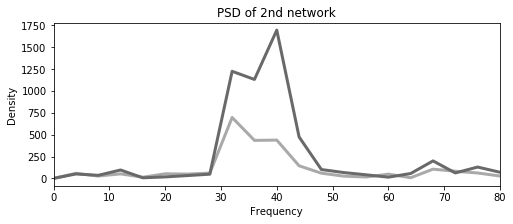

In [10]:
# TODO: build plot collection that displays state of the two coupled populations as good as possible
# plots.ou_noise_by_params(params=model["params"])

plots.lfp_nets(model)

plots.raster(title="First 100 ms of 1st network", model=model, x_left=0, x_right=100)
plots.raster(title="First 100 ms of 2nd network", model=model, x_left=0, x_right=100, population=2)

plots.raster(title="Raster of 1st network", model=model)
plots.raster(title="Raster of 2nd network", model=model, population=2)

# plots.lfp(title="Summed Voltage of 1st network", model=model)
# plots.lfp(title="Summed Voltage of 2nd network", model=model, population=2)

plots.population_rates(model)

plots.psd(model, title="PSD of 1st network")
plots.psd(model, title="PSD of 2nd network", population=2)


# Desynchronization

We want to create an initial state where both networks are desynchronized, meaning the phases of their LFPs are not synchronized.

TODO: configure phase delays, and increase delay in inter-network connections.

The network should not be too similar. At the moment they are almost identical in their configuration.